In [2]:
%%capture
%pylab inline
!pip install ipypublish
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.external import mathjax
from ipypublish import nb_setup
from sklearn.preprocessing import StandardScaler
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib as mpl
from prophet import Prophet
import matplotlib.pyplot as plt
# import plotly.espress as px
%load_ext rpy2.ipython
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
# !pip install plotly

In [6]:
# Basic lines of code needed to import a data file with permissions from Google Drive
from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
#os.chdir("drive/MyDrive/ML4Finance/")
os.chdir("drive/MyDrive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
affects = pd.read_csv("Semiconductor shortage affects.csv")
affects.head()

,DATE,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
0,01-01-1985,100.5,.,.,670.8,.,5.5335,.,NaN,81.4300
1,01-02-1985,100.8,.,.,665.6,.,5.3861,.,NaN,81.4319
2,01-03-1985,100.9,169,141.6,660.9,223.9,5.3103,69.2,NaN,82.1699
3,01-04-1985,100.6,.,.,653.9,.,5.1255,.,NaN,81.9731
4,01-05-1985,100.1,.,.,647.2,.,5.0821,.,NaN,82.1311


In [11]:
sox = pd.read_csv("SOX.csv")
sox.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-06-01,121.775002,128.500000,121.285004,128.244995,128.182968,0
1,1994-06-02,128.244995,129.774994,128.054993,128.304993,128.242935,0
2,1994-06-03,128.304993,129.869995,126.724998,126.959999,126.898598,0
3,1994-06-06,126.959999,127.904999,126.044998,126.250000,126.188942,0
4,1994-06-07,126.250000,126.635002,123.029999,123.144997,123.085442,0


<Axes: xlabel='Date', ylabel='Adj Close'>

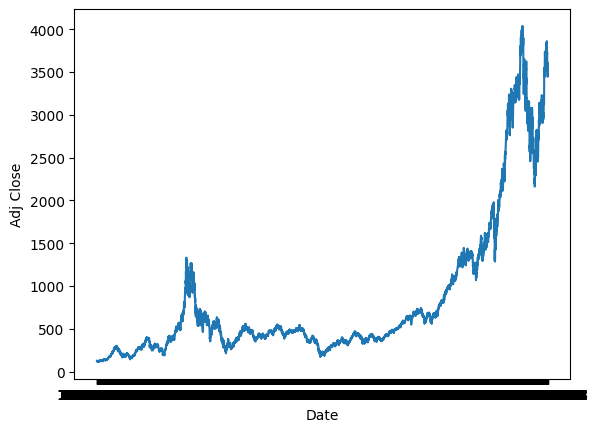

In [12]:
sns.lineplot(data=sox,x='Date', y='Adj Close')

In [13]:
sox['ret'] = sox['Adj Close'].pct_change().shift(-1)

In [14]:
sox

,Date,Open,High,Low,Close,Adj Close,Volume,ret
0,1994-06-01,121.775002,128.500000,121.285004,128.244995,128.182968,0,0.000468
1,1994-06-02,128.244995,129.774994,128.054993,128.304993,128.242935,0,-0.010483
2,1994-06-03,128.304993,129.869995,126.724998,126.959999,126.898598,0,-0.005592
3,1994-06-06,126.959999,127.904999,126.044998,126.250000,126.188942,0,-0.024594
4,1994-06-07,126.250000,126.635002,123.029999,123.144997,123.085442,0,-0.044135
...,...,...,...,...,...,...,...,...
7355,2023-08-17,3492.790039,3492.790039,3437.870117,3446.350098,3446.350098,0,0.004756
7356,2023-08-18,3411.469971,3475.860107,3405.350098,3462.739990,3462.739990,0,0.028301
7357,2023-08-21,3481.229980,3565.760010,3475.580078,3560.739990,3560.739990,0,-0.009282
7358,2023-08-22,3606.280029,3610.149902,3516.750000,3527.689941,3527.689941,0,0.021068


In [15]:
sox['mm'] = sox.apply(lambda x: x['Date'][:7], axis=1)

In [16]:
affects = affects.replace('.', np.nan)

In [17]:
affects["DATE"]= pd.to_datetime(affects.DATE, format='%d-%m-%Y')
for col in affects.columns:
  if col != "DATE" and affects[col].dtypes == object:
    affects[col] = affects[col].astype(np.float16)

In [18]:
affects = affects[affects.isnull().sum(axis=1) < 5]

In [19]:
affects['mm'] = affects.apply(lambda x: str(x['DATE'])[:7], axis=1)
affects

,DATE,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors",mm
2,1985-03-01,100.900,169.00000,141.62500,660.9,223.87500,5.3103,69.1875,NaN,82.1699,1985-03
5,1985-06-01,100.100,169.62500,147.50000,639.6,220.87500,5.0562,70.3125,NaN,82.2561,1985-06
8,1985-09-01,100.500,163.75000,137.25000,618.1,220.37500,4.8799,71.6875,NaN,82.5875,1985-09
11,1985-12-01,100.800,155.87500,137.62500,603.9,218.87500,4.9321,74.0000,NaN,83.2342,1985-12
14,1986-03-01,101.800,159.00000,132.12500,604.7,221.00000,5.0217,76.6250,NaN,83.4888,1986-03
...,...,...,...,...,...,...,...,...,...,...,...
437,2021-06-01,54.700,61.09375,57.09375,372.3,44.81250,2.0354,116.8125,NaN,97.9570,2021-06
438,2021-07-01,54.558,61.00000,57.31250,372.0,44.81250,1.9941,117.1250,NaN,98.9919,2021-07
439,2021-08-01,54.717,61.00000,57.40625,373.2,44.81250,1.9822,117.1875,NaN,99.0165,2021-08
440,2021-09-01,54.789,61.40625,57.50000,374.2,45.09375,2.0024,117.1875,NaN,98.8120,2021-09


In [20]:
affects.drop("Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors", axis=1, inplace=True)

In [35]:
n = sox.merge(affects, on='mm')
reg_data = n
n

,Date,Open,High,Low,Close,Adj Close,Volume,ret,mm,DATE,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
0,1994-06-01,121.775002,128.500000,121.285004,128.244995,128.182968,0,0.000468,1994-06,1994-06-01,105.500,138.62500,161.6250,532.7,163.87500,6.3966,108.6875,97.6017
1,1994-06-02,128.244995,129.774994,128.054993,128.304993,128.242935,0,-0.010483,1994-06,1994-06-01,105.500,138.62500,161.6250,532.7,163.87500,6.3966,108.6875,97.6017
2,1994-06-03,128.304993,129.869995,126.724998,126.959999,126.898598,0,-0.005592,1994-06,1994-06-01,105.500,138.62500,161.6250,532.7,163.87500,6.3966,108.6875,97.6017
3,1994-06-06,126.959999,127.904999,126.044998,126.250000,126.188942,0,-0.024594,1994-06,1994-06-01,105.500,138.62500,161.6250,532.7,163.87500,6.3966,108.6875,97.6017
4,1994-06-07,126.250000,126.635002,123.029999,123.144997,123.085442,0,-0.044135,1994-06,1994-06-01,105.500,138.62500,161.6250,532.7,163.87500,6.3966,108.6875,97.6017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,2021-10-25,3384.939941,3412.399902,3377.969971,3392.389893,3392.389893,0,0.000168,2021-10,2021-10-01,55.058,61.09375,57.1875,375.4,44.90625,1.9712,117.3750,99.1646
6901,2021-10-26,3420.330078,3427.899902,3381.149902,3392.959961,3392.959961,0,-0.009629,2021-10,2021-10-01,55.058,61.09375,57.1875,375.4,44.90625,1.9712,117.3750,99.1646
6902,2021-10-27,3365.110107,3399.129883,3353.780029,3360.290039,3360.290039,0,0.023373,2021-10,2021-10-01,55.058,61.09375,57.1875,375.4,44.90625,1.9712,117.3750,99.1646
6903,2021-10-28,3406.300049,3440.580078,3402.969971,3438.830078,3438.830078,0,0.003617,2021-10,2021-10-01,55.058,61.09375,57.1875,375.4,44.90625,1.9712,117.3750,99.1646


In [22]:
n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6905 entries, 0 to 6904
Data columns (total 18 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype         
---  ------                                                                                                                       --------------  -----         
 0   Date                                                                                                                         6905 non-null   object        
 1   Open                                                                                                                         6905 non-null   float64       
 2   High                                                                                                                         6905 non-null   float64       
 3   Low                                                                                

In [23]:
for col in affects.columns:
  if col not in ("DATE", "mm",
                 "Export Price Index(End Use of semiconductors)", "Import Price Index(in $ End Use of semiconductors)",
                 "Export Price Index (End use excluding without semiconductors)",
                 "Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors"):
    ret_name = f"{col}_ret"
    print(col)
    print(ret_name)
    n[ret_name] = n[col].pct_change()
    # sns.scatterplot(data=n, x=ret_name, y="ret")

Producer Price Index(By  Industry in $)
Producer Price Index(By  Industry in $)_ret
No. of employed peoples in semiconductor industry
No. of employed peoples in semiconductor industry_ret
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)_ret
Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors
Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors_ret


In [24]:
ret_cols = [a for a in n.columns if a[-3:] == "ret"]
ret_cols

['ret',
 'Producer Price Index(By  Industry in $)_ret',
 'No. of employed peoples in semiconductor industry_ret',
 'Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)_ret',
 'Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors_ret']

In [25]:
n[ret_cols]

,ret,Producer Price Index(By Industry in $)_ret,No. of employed peoples in semiconductor industry_ret,Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)_ret,"Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors_ret"
0,0.000468,NaN,NaN,NaN,NaN
1,-0.010483,0.0,0.0,0.0,0.0
2,-0.005592,0.0,0.0,0.0,0.0
3,-0.024594,0.0,0.0,0.0,0.0
4,-0.044135,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6900,0.000168,0.0,0.0,0.0,0.0
6901,-0.009629,0.0,0.0,0.0,0.0
6902,0.023373,0.0,0.0,0.0,0.0
6903,0.003617,0.0,0.0,0.0,0.0


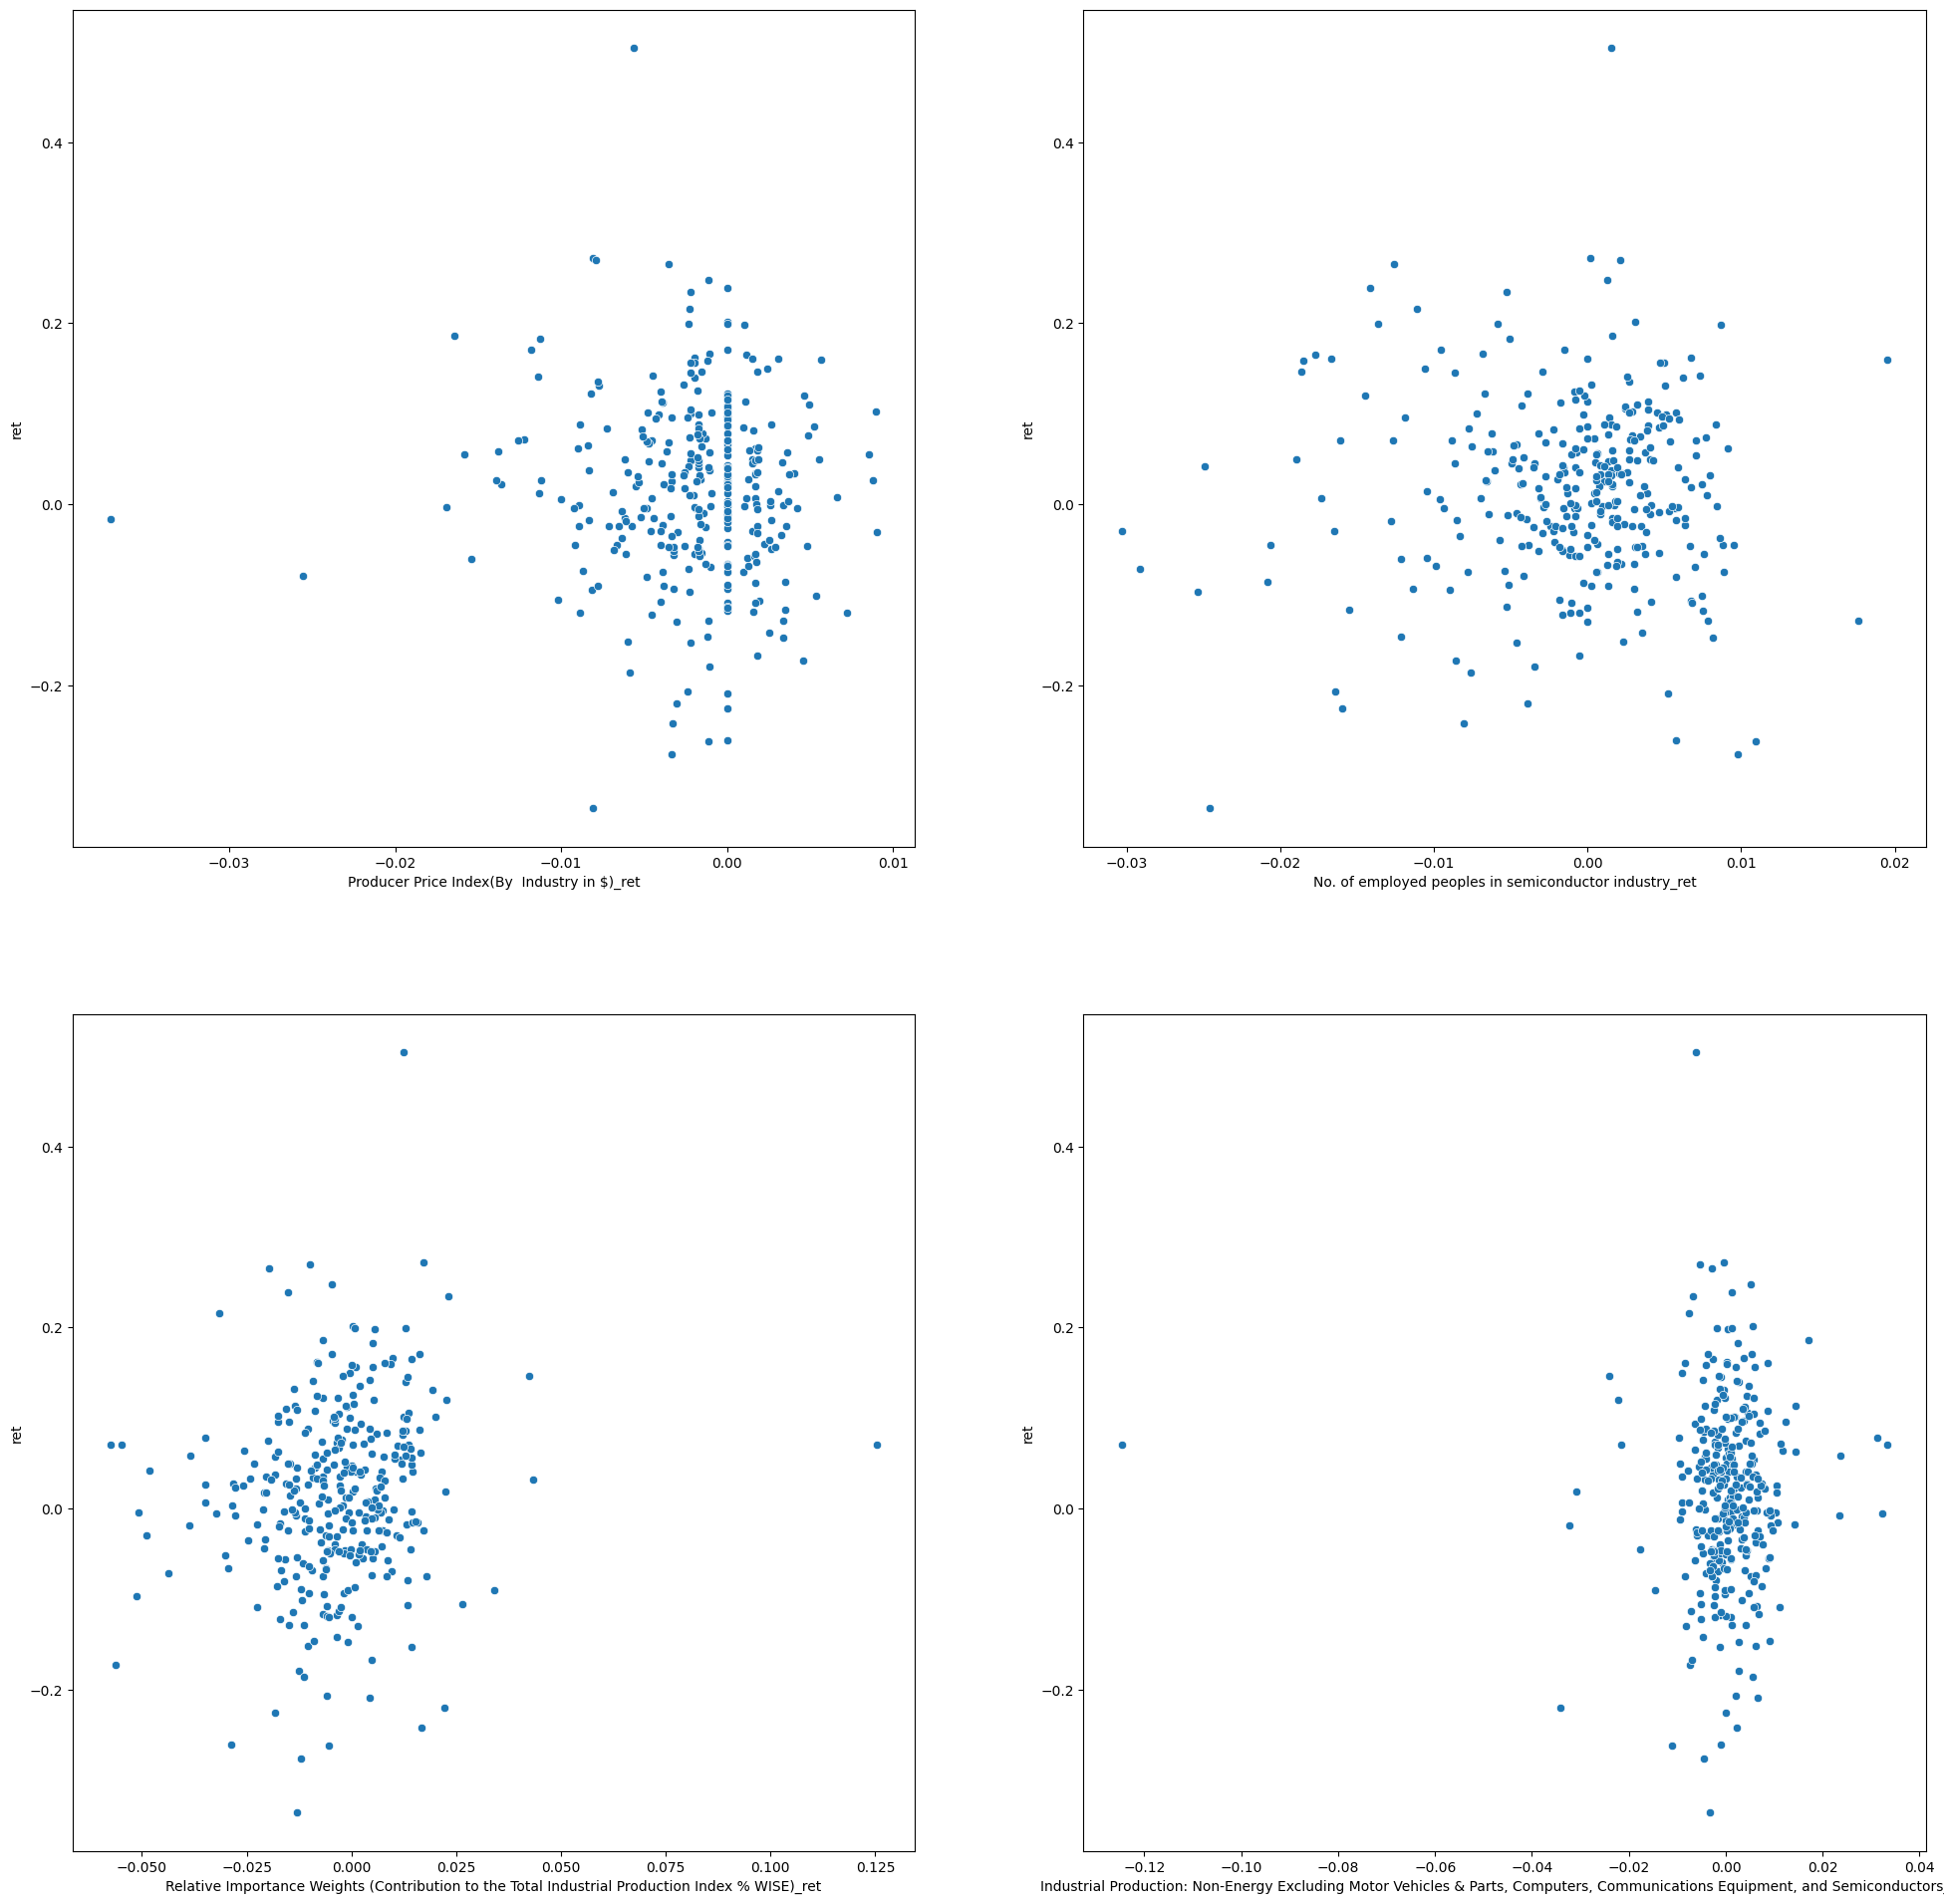

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
axs = axs.flatten()
for i in range(1, len(ret_cols)):
  sns.scatterplot(data=n, x=ret_cols[i], y='ret', ax=axs[i-1])

In [ ]:
n

,Date,Open,High,Low,Close,Adj Close,Volume,ret,mm,DATE,...,"Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors",Producer Price Index(By Industry in $)_ret,Export Price Index(End Use of semiconductors)_ret,Import Price Index(in $ End Use of semiconductors)_ret,No. of employed peoples in semiconductor industry_ret,Export Price Index (End use excluding without semiconductors)_ret,Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)_ret,"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors_ret","Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors_ret","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors_ret"
0,1994-06-01,121.775002,129.869995,112.714996,119.464996,119.407219,0,0.025028,1994-06,1994-06-01,...,97.6017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994-07-01,119.464996,132.990005,115.360001,122.455002,122.395782,0,0.101629,1994-07,1994-07-01,...,97.7808,-0.000948,-0.000948,-0.000948,-0.000948,-0.000948,-0.000948,-0.000948,-0.000948,-0.000948
2,1994-08-01,122.455002,139.494995,121.790001,134.899994,134.834747,0,-0.045478,1994-08,1994-08-01,...,98.1665,-0.006641,-0.006641,-0.006641,-0.006641,-0.006641,-0.006641,-0.006641,-0.006641,-0.006641
3,1994-09-01,134.899994,138.074997,126.739998,128.764999,128.702728,0,0.100998,1994-09,1994-09-01,...,98.3376,-0.004776,-0.004776,-0.004776,-0.004776,-0.004776,-0.004776,-0.004776,-0.004776,-0.004776
4,1994-10-01,128.764999,142.774994,117.440002,141.770004,141.701447,0,-0.023983,1994-10,1994-10-01,...,98.9927,-0.005758,-0.005758,-0.005758,-0.005758,-0.005758,-0.005758,-0.005758,-0.005758,-0.005758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2021-07-01,3336.129883,3361.169922,3088.330078,3356.530029,3356.530029,0,0.018230,2021-07,2021-07-01,...,98.9919,-0.002596,-0.002596,-0.002596,-0.002596,-0.002596,-0.002596,-0.002596,-0.002596,-0.002596
326,2021-08-01,3388.500000,3477.929932,3166.830078,3417.719971,3417.719971,0,-0.046707,2021-08,2021-08-01,...,99.0165,0.002914,0.002914,0.002914,0.002914,0.002914,0.002914,0.002914,0.002914,0.002914
327,2021-09-01,3431.000000,3484.189941,3257.209961,3258.090088,3258.090088,0,0.059292,2021-09,2021-09-01,...,98.8120,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316
328,2021-10-01,3275.280029,3452.830078,3165.350098,3451.270020,3451.270020,0,0.110669,2021-10,2021-10-01,...,99.1646,0.004910,0.004910,0.004910,0.004910,0.004910,0.004910,0.004910,0.004910,0.004910


<Axes: xlabel='DATE'>

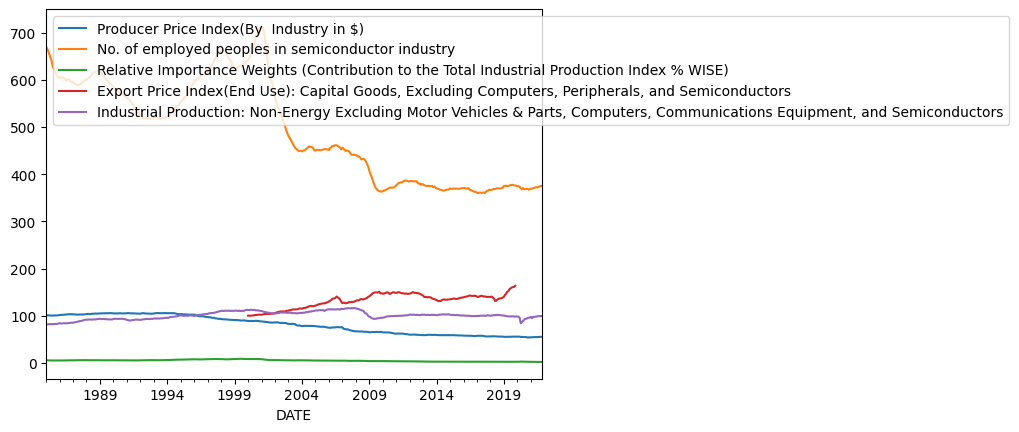

In [ ]:
affects.plot(x="DATE")

In [ ]:
affects.DATE.min(), affects.DATE.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2021-11-01 00:00:00'))

In [ ]:
affects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 10 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                       --------------  -----  
 0   DATE                                                                                                                         443 non-null    object 
 1   Producer Price Index(By  Industry in $)                                                                                      443 non-null    float64
 2   Export Price Index(End Use of semiconductors)                                                                                442 non-null    object 
 3   Import Price Index(in $ End Use of semiconductors)                                                                      

In [ ]:
affects.describe()

,Producer Price Index(By Industry in $),No. of employed peoples in semiconductor industry,Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
count,443.000000,443.000000,442.000000,239.000000,442.000000
mean,80.793465,492.939052,4.821822,131.856485,100.465446
std,19.222619,107.715370,1.864670,15.408438,8.150622
min,53.800000,359.800000,1.971200,99.800000,81.430000
25%,59.500000,375.100000,3.008350,121.100000,94.226625
50%,82.100000,461.700000,5.118300,135.600000,100.437500
75%,102.200000,598.650000,5.679825,142.450000,106.312425
max,105.700000,714.500000,8.626700,163.500000,116.123100


In [ ]:
affects.select_dtypes(include=np.number)

,Producer Price Index(By Industry in $),No. of employed peoples in semiconductor industry,Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
0,100.500,670.8,5.5335,NaN,81.4300
1,100.800,665.6,5.3861,NaN,81.4319
2,100.900,660.9,5.3103,NaN,82.1699
3,100.600,653.9,5.1255,NaN,81.9731
4,100.100,647.2,5.0821,NaN,82.1311
...,...,...,...,...,...
438,54.558,372.0,1.9941,NaN,98.9919
439,54.717,373.2,1.9822,NaN,99.0165
440,54.789,374.2,2.0024,NaN,98.8120
441,55.058,375.4,1.9712,NaN,99.1646


In [ ]:
affects.select_dtypes(exclude=np.number)

,DATE,Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),Export Price Index (End use excluding without semiconductors),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors"
0,01-01-1985,.,.,.,.
1,01-02-1985,.,.,.,.
2,01-03-1985,169,141.6,223.9,69.2
3,01-04-1985,.,.,.,.
4,01-05-1985,.,.,.,.
...,...,...,...,...,...
438,01-07-2021,61,57.3,44.8,117.1
439,01-08-2021,61,57.4,44.8,117.2
440,01-09-2021,61.4,57.5,45.1,117.2
441,01-10-2021,61.1,57.2,44.9,117.4


In [ ]:
for col in affects.columns:
  if col != "DATE" and affects[col].dtypes == object:
    print(col, affects[col].dtypes)

Export Price Index(End Use of semiconductors) object
Import Price Index(in $ End Use of semiconductors) object
Export Price Index (End use excluding without semiconductors) object
Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors object


In [ ]:
for col in affects.columns:
  if col != "DATE" and affects[col].dtypes != object:
    print(col, affects[col].dtypes)

Producer Price Index(By  Industry in $) float64
No. of employed peoples in semiconductor industry float64
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE) float64
Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors float64
Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors float64


In [ ]:
affects = affects.replace('.', np.nan)

In [ ]:
for col in affects.columns:
  if col != "DATE" and affects[col].dtypes == object:
    affects[col] = affects[col].astype(np.float16)

In [ ]:
affects.describe()

,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
count,443.000000,370.0000,370.00000,443.000000,370.00000,442.000000,370.0000,239.000000,442.000000
mean,80.793465,88.0625,92.81250,492.939052,92.25000,4.821822,107.1875,131.856485,100.465446
std,19.222619,32.2500,32.84375,107.715370,49.03125,1.864670,8.4375,15.408438,8.150622
min,53.800000,59.0000,55.68750,359.800000,42.40625,1.971200,69.1875,99.800000,81.430000
25%,59.500000,62.1250,64.81250,375.100000,56.12500,3.008350,101.1875,121.100000,94.226625
50%,82.100000,69.5000,84.81250,461.700000,77.25000,5.118300,110.1250,135.600000,100.437500
75%,102.200000,110.8125,104.62500,598.650000,110.18750,5.679825,113.8125,142.450000,106.312425
max,105.700000,169.6250,167.50000,714.500000,223.87500,8.626700,117.5000,163.500000,116.123100


In [ ]:
affects["DATE"]

0     1985-01-01
1     1985-02-01
2     1985-03-01
3     1985-04-01
4     1985-05-01
         ...    
438   2021-07-01
439   2021-08-01
440   2021-09-01
441   2021-10-01
442   2021-11-01
Name: DATE, Length: 443, dtype: datetime64[ns]

In [ ]:
affects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 10 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype         
---  ------                                                                                                                       --------------  -----         
 0   DATE                                                                                                                         443 non-null    datetime64[ns]
 1   Producer Price Index(By  Industry in $)                                                                                      443 non-null    float64       
 2   Export Price Index(End Use of semiconductors)                                                                                370 non-null    float16       
 3   Import Price Index(in $ End Use of semiconductors)                                   

In [ ]:
ppi = pd.read_excel("PPI.xlsx", skiprows=2)

In [ ]:
ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 5 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                                                                        --------------  -----         
 0   Month Observation                                                                                                                                             583 non-null    datetime64[ns]
 1   Producer Price Index by Industry: Semiconductor and Other Electronic Component Manufacturing, Percent Change from Year Ago, Monthly, Not Seasonally Adjusted  464 non-null    float64       
 2   Producer Prices Index: Total Intermediate Goods for the United States, Percent Change from Year Ago, Monthly, Not S

In [ ]:
df = pd.merge(affects, ppi, how='inner', left_on="DATE", right_on="Unnamed: 3")
df = df.drop(columns = ["Month Observation", "Unnamed: 3", "Unnamed: 4"])
df = df[df.isnull().sum(axis=1) < 5]

array([[<Axes: xlabel='Producer Price Index(By  Industry in $)', ylabel='Producer Price Index(By  Industry in $)'>,
        <Axes: xlabel='Export Price Index(End Use of semiconductors)', ylabel='Producer Price Index(By  Industry in $)'>,
        <Axes: xlabel='Import Price Index(in $ End Use of semiconductors)', ylabel='Producer Price Index(By  Industry in $)'>,
        <Axes: xlabel='No. of employed peoples in semiconductor industry', ylabel='Producer Price Index(By  Industry in $)'>,
        <Axes: xlabel='Export Price Index (End use excluding without semiconductors)', ylabel='Producer Price Index(By  Industry in $)'>,
        <Axes: xlabel='Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)', ylabel='Producer Price Index(By  Industry in $)'>,
        <Axes: xlabel='Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors', ylabel='Producer Price Index(By  Industry in $)'>,
        <Axes: xlabel='Export 

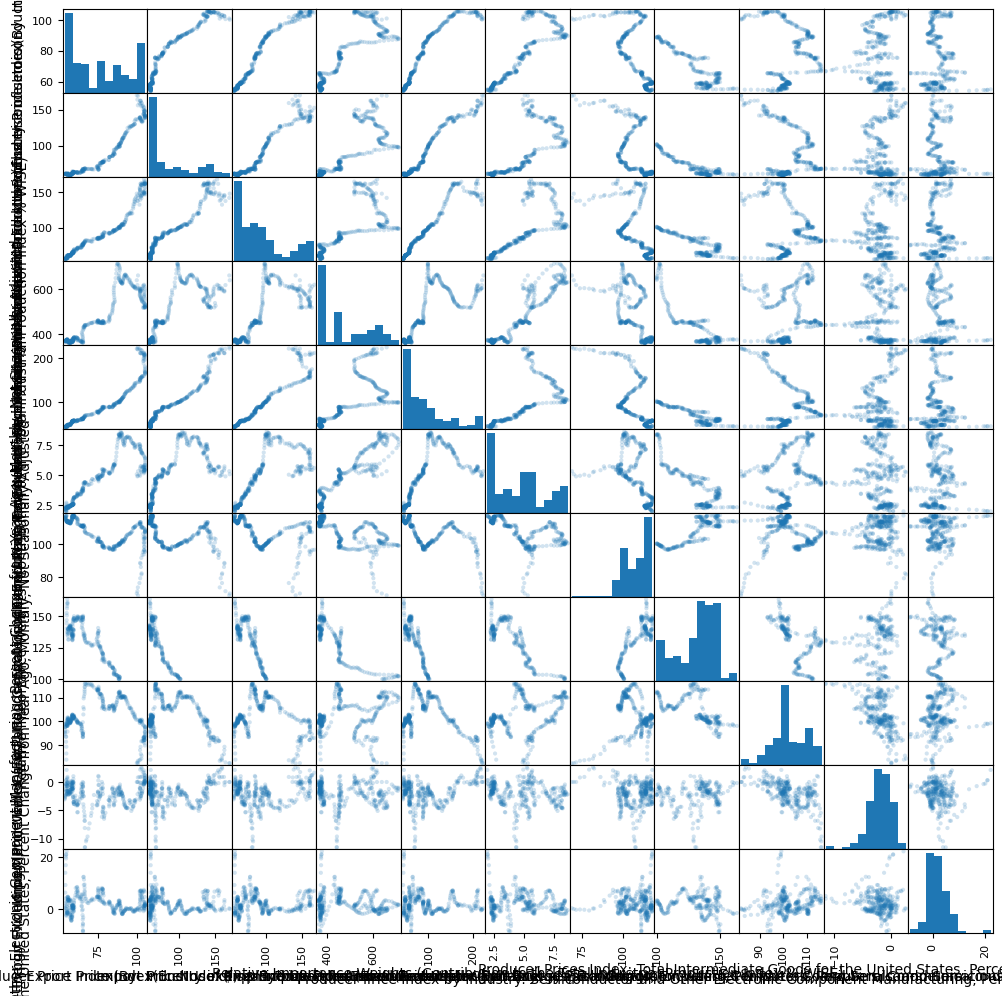

In [ ]:
pd.plotting.scatter_matrix(df.drop("DATE", axis=1), alpha=0.2,  figsize=(12, 12))

In [ ]:
df = n[["DATE"] + ret_cols]
df

,DATE,ret,Producer Price Index(By Industry in $)_ret,No. of employed peoples in semiconductor industry_ret,Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)_ret,"Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors_ret"
0,1994-06-01,0.025028,NaN,NaN,NaN,NaN
1,1994-07-01,0.101629,-0.000948,0.004505,0.012319,0.001835
2,1994-08-01,-0.045478,-0.006641,0.008783,0.014022,0.003945
3,1994-09-01,0.100998,-0.004776,0.005743,0.020042,0.001743
4,1994-10-01,-0.023983,-0.005758,0.003500,0.017230,0.006662
...,...,...,...,...,...,...
324,2021-06-01,0.003354,0.003670,0.000537,-0.028588,-0.000132
325,2021-07-01,0.018230,-0.002596,-0.000806,-0.020291,0.010565
326,2021-08-01,-0.046707,0.002914,0.003226,-0.005968,0.000249
327,2021-09-01,0.059292,0.001316,0.002680,0.010191,-0.002065


In [ ]:
df.head(30)

,DATE,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors","Producer Price Index by Industry: Semiconductor and Other Electronic Component Manufacturing, Percent Change from Year Ago, Monthly, Not Seasonally Adjusted","Producer Prices Index: Total Intermediate Goods for the United States, Percent Change from Year Ago, Monthly, Not Seasonally Adjusted"
2,1985-03-01,100.9,169.000,141.625,660.9,223.875,5.3103,69.1875,NaN,82.1699,0.00000,0.28736
5,1985-06-01,100.1,169.625,147.500,639.6,220.875,5.0562,70.3125,NaN,82.2561,0.00000,0.00000
8,1985-09-01,100.5,163.750,137.250,618.1,220.375,4.8799,71.6875,NaN,82.5875,0.00000,-0.28626
11,1985-12-01,100.8,155.875,137.625,603.9,218.875,4.9321,74.0000,NaN,83.2342,0.80000,-0.19102
14,1986-03-01,101.8,159.000,132.125,604.7,221.000,5.0217,76.6250,NaN,83.4888,0.89197,-0.28653
17,1986-06-01,102.3,157.250,138.875,602.3,218.625,4.9327,79.5000,NaN,83.7559,2.19780,-0.57197
20,1986-09-01,103.1,158.875,141.250,601.0,217.750,5.2270,81.8125,NaN,84.1880,2.58706,0.19139
23,1986-12-01,103.2,159.250,144.875,595.1,216.500,5.2811,82.5000,NaN,85.4420,2.38095,0.19139
26,1987-03-01,102.7,161.750,143.125,592.0,211.125,5.3921,86.3125,NaN,86.1316,0.88409,1.14943
29,1987-06-01,102.2,162.250,145.625,588.9,211.125,5.5504,88.8125,NaN,87.8010,-0.09775,2.68456


In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time series analysis')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Dickey-Fuller criterion: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

Dickey-Fuller criterion: p=0.000000


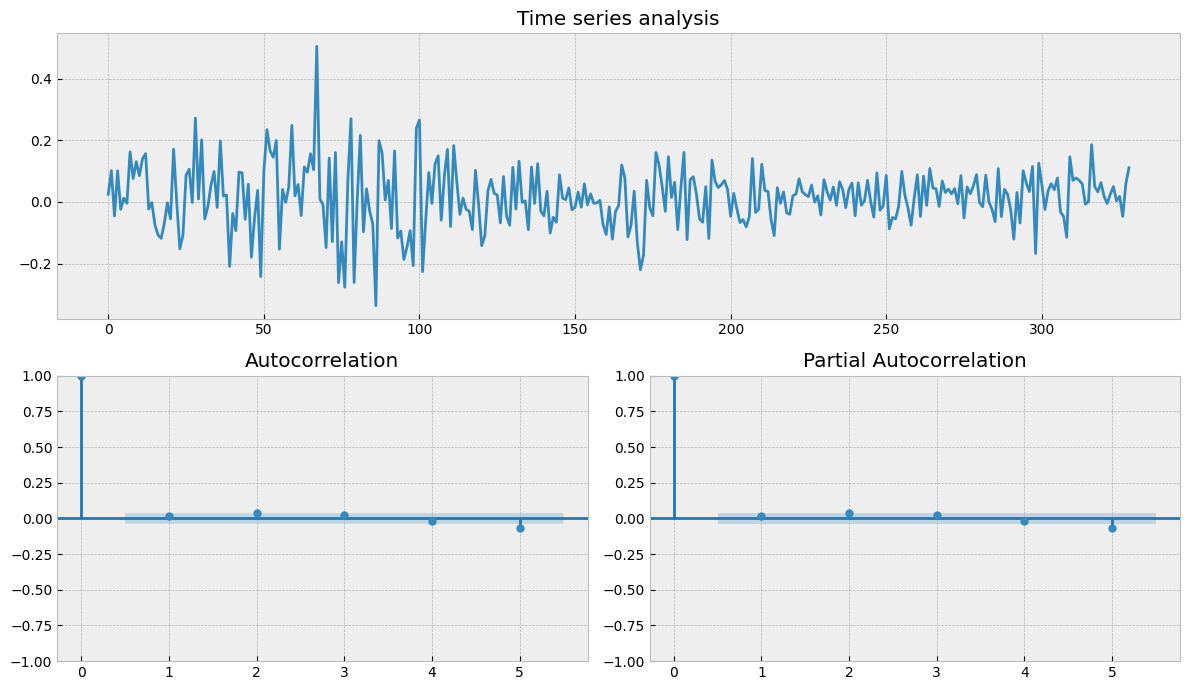

In [ ]:
tsplot(df["ret"], lags=5)

In [ ]:
def cor_with_features(dataset,target,amount):
  correlation = dataset.corr()
  cols = correlation.nlargest(amount,target)[target].index
  cm = np.corrcoef(dataset[cols].values.T)
  f , ax = plt.subplots(figsize = (14,12))
  sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
  return plt.show()

<ipython-input-52-78aaa7897280>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


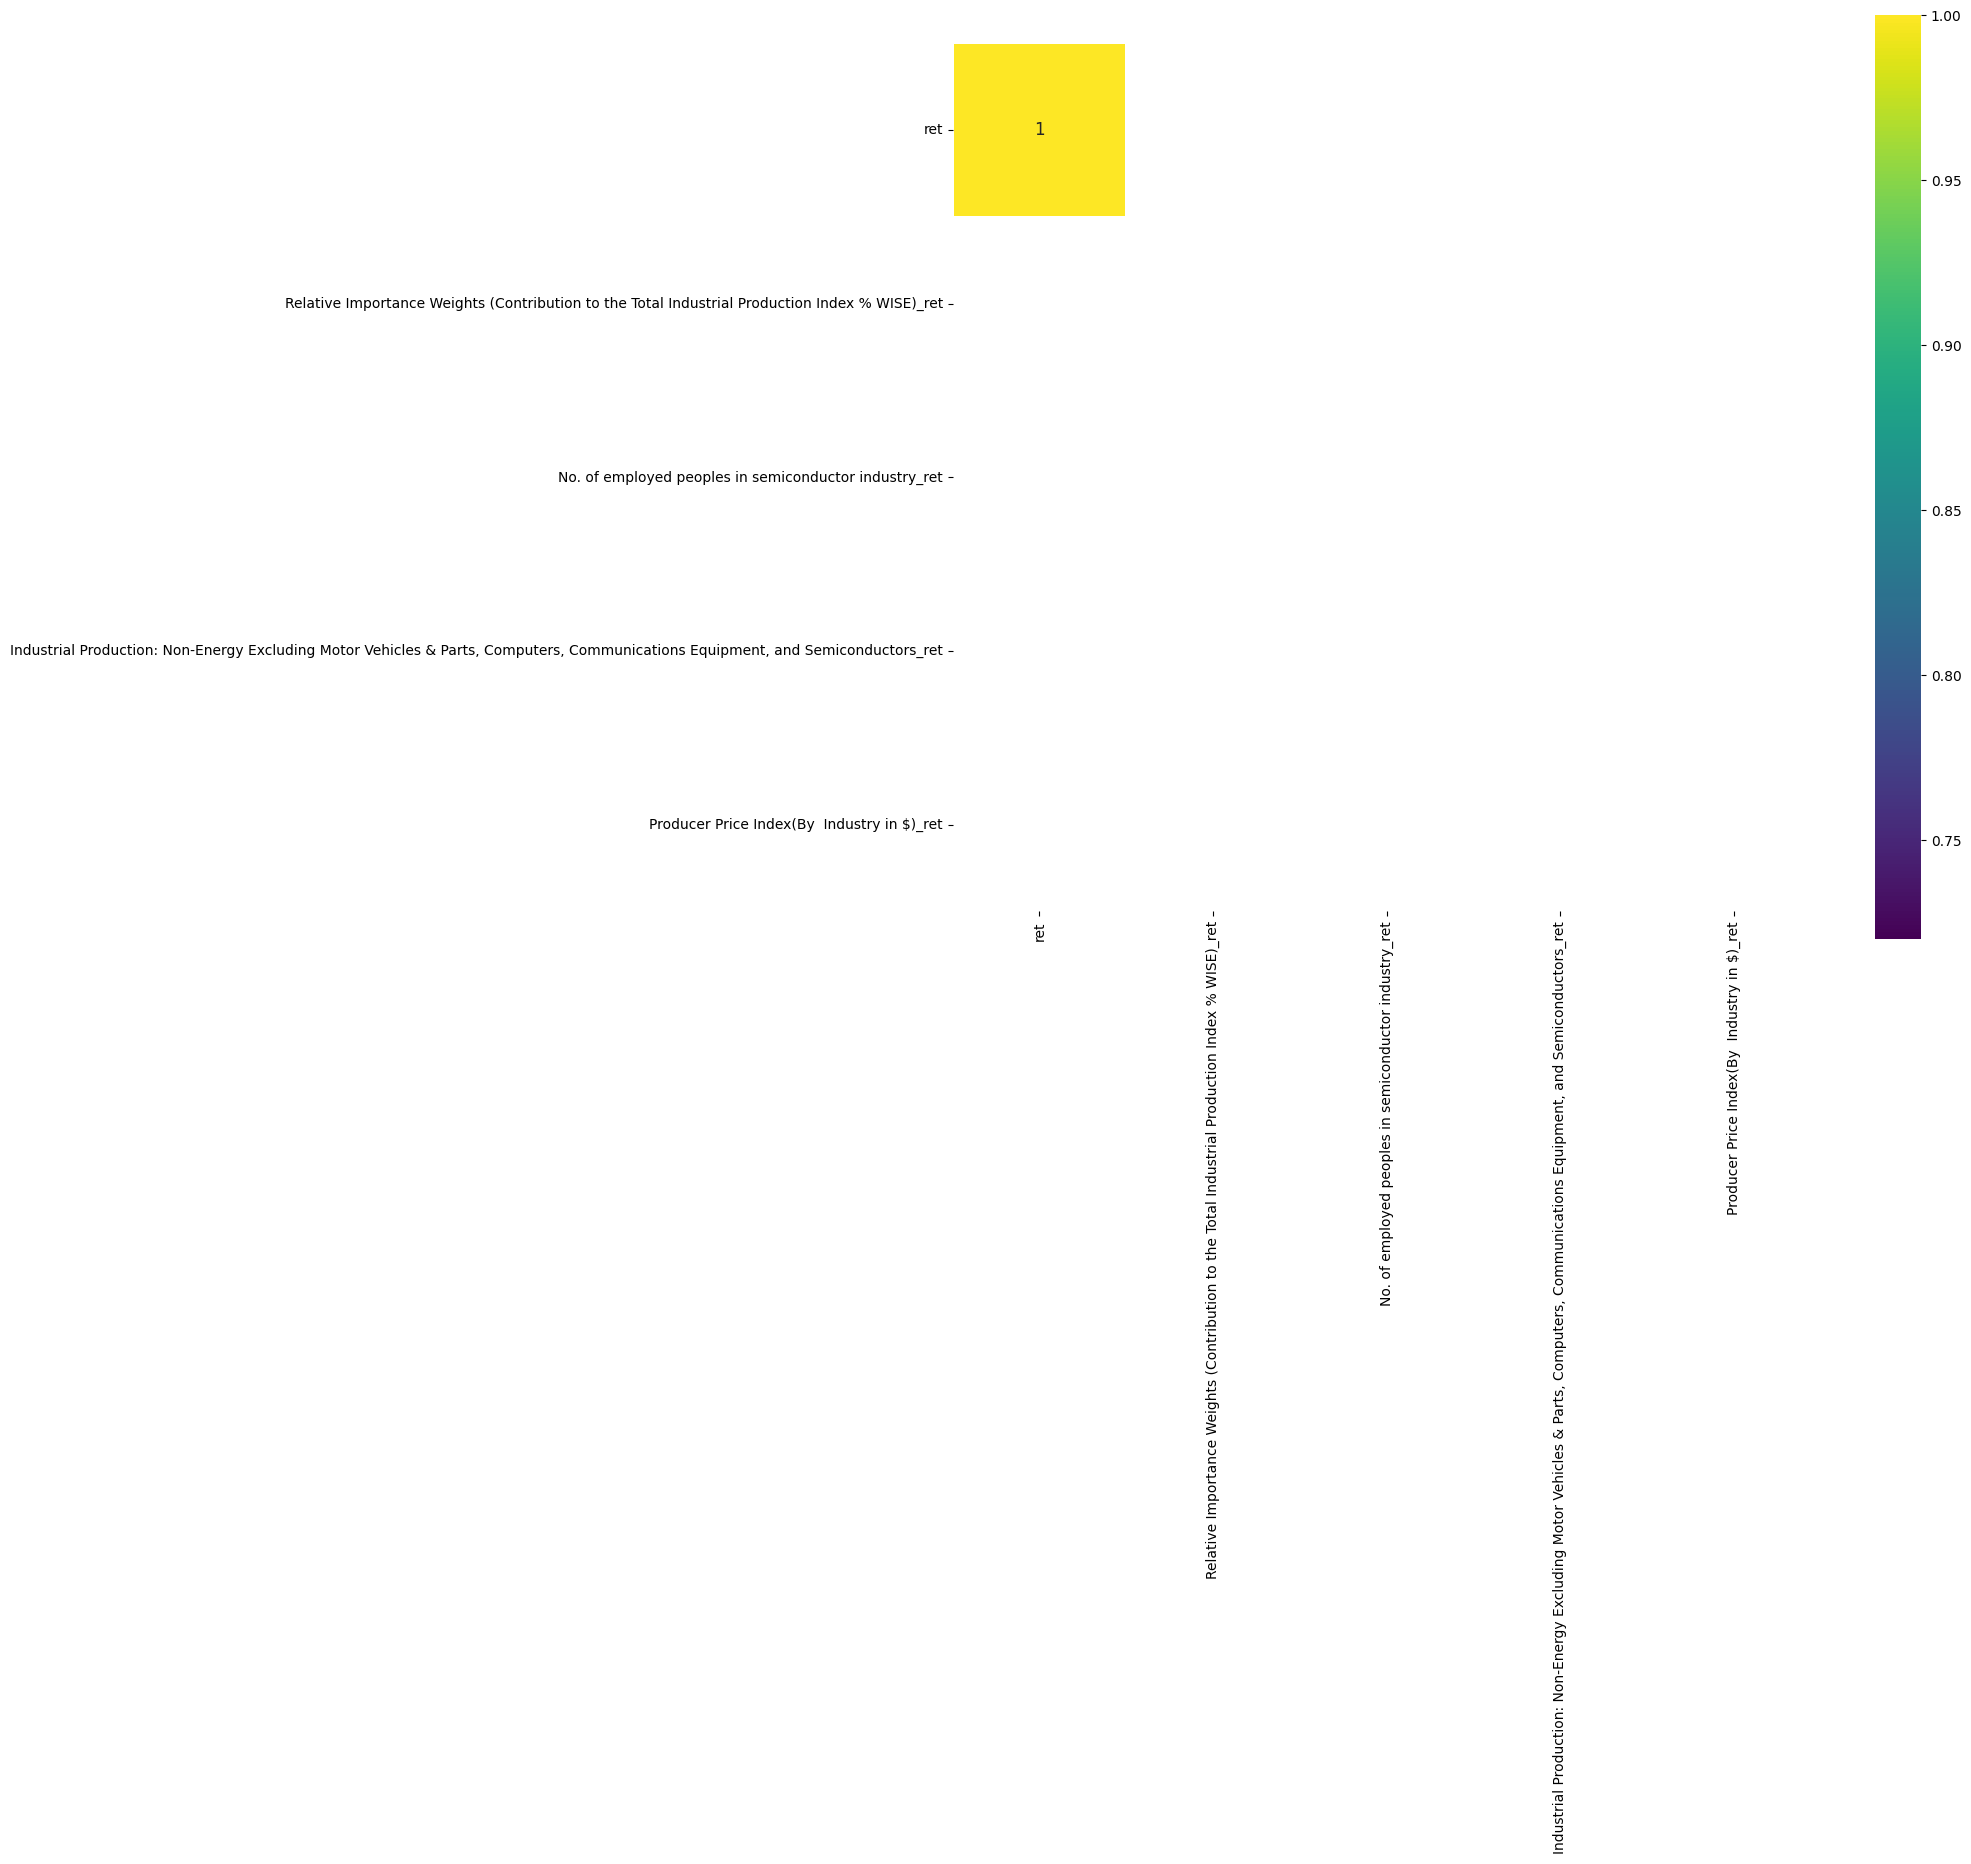

In [ ]:
cor_with_features(df,'ret',10)

<ipython-input-52-78aaa7897280>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


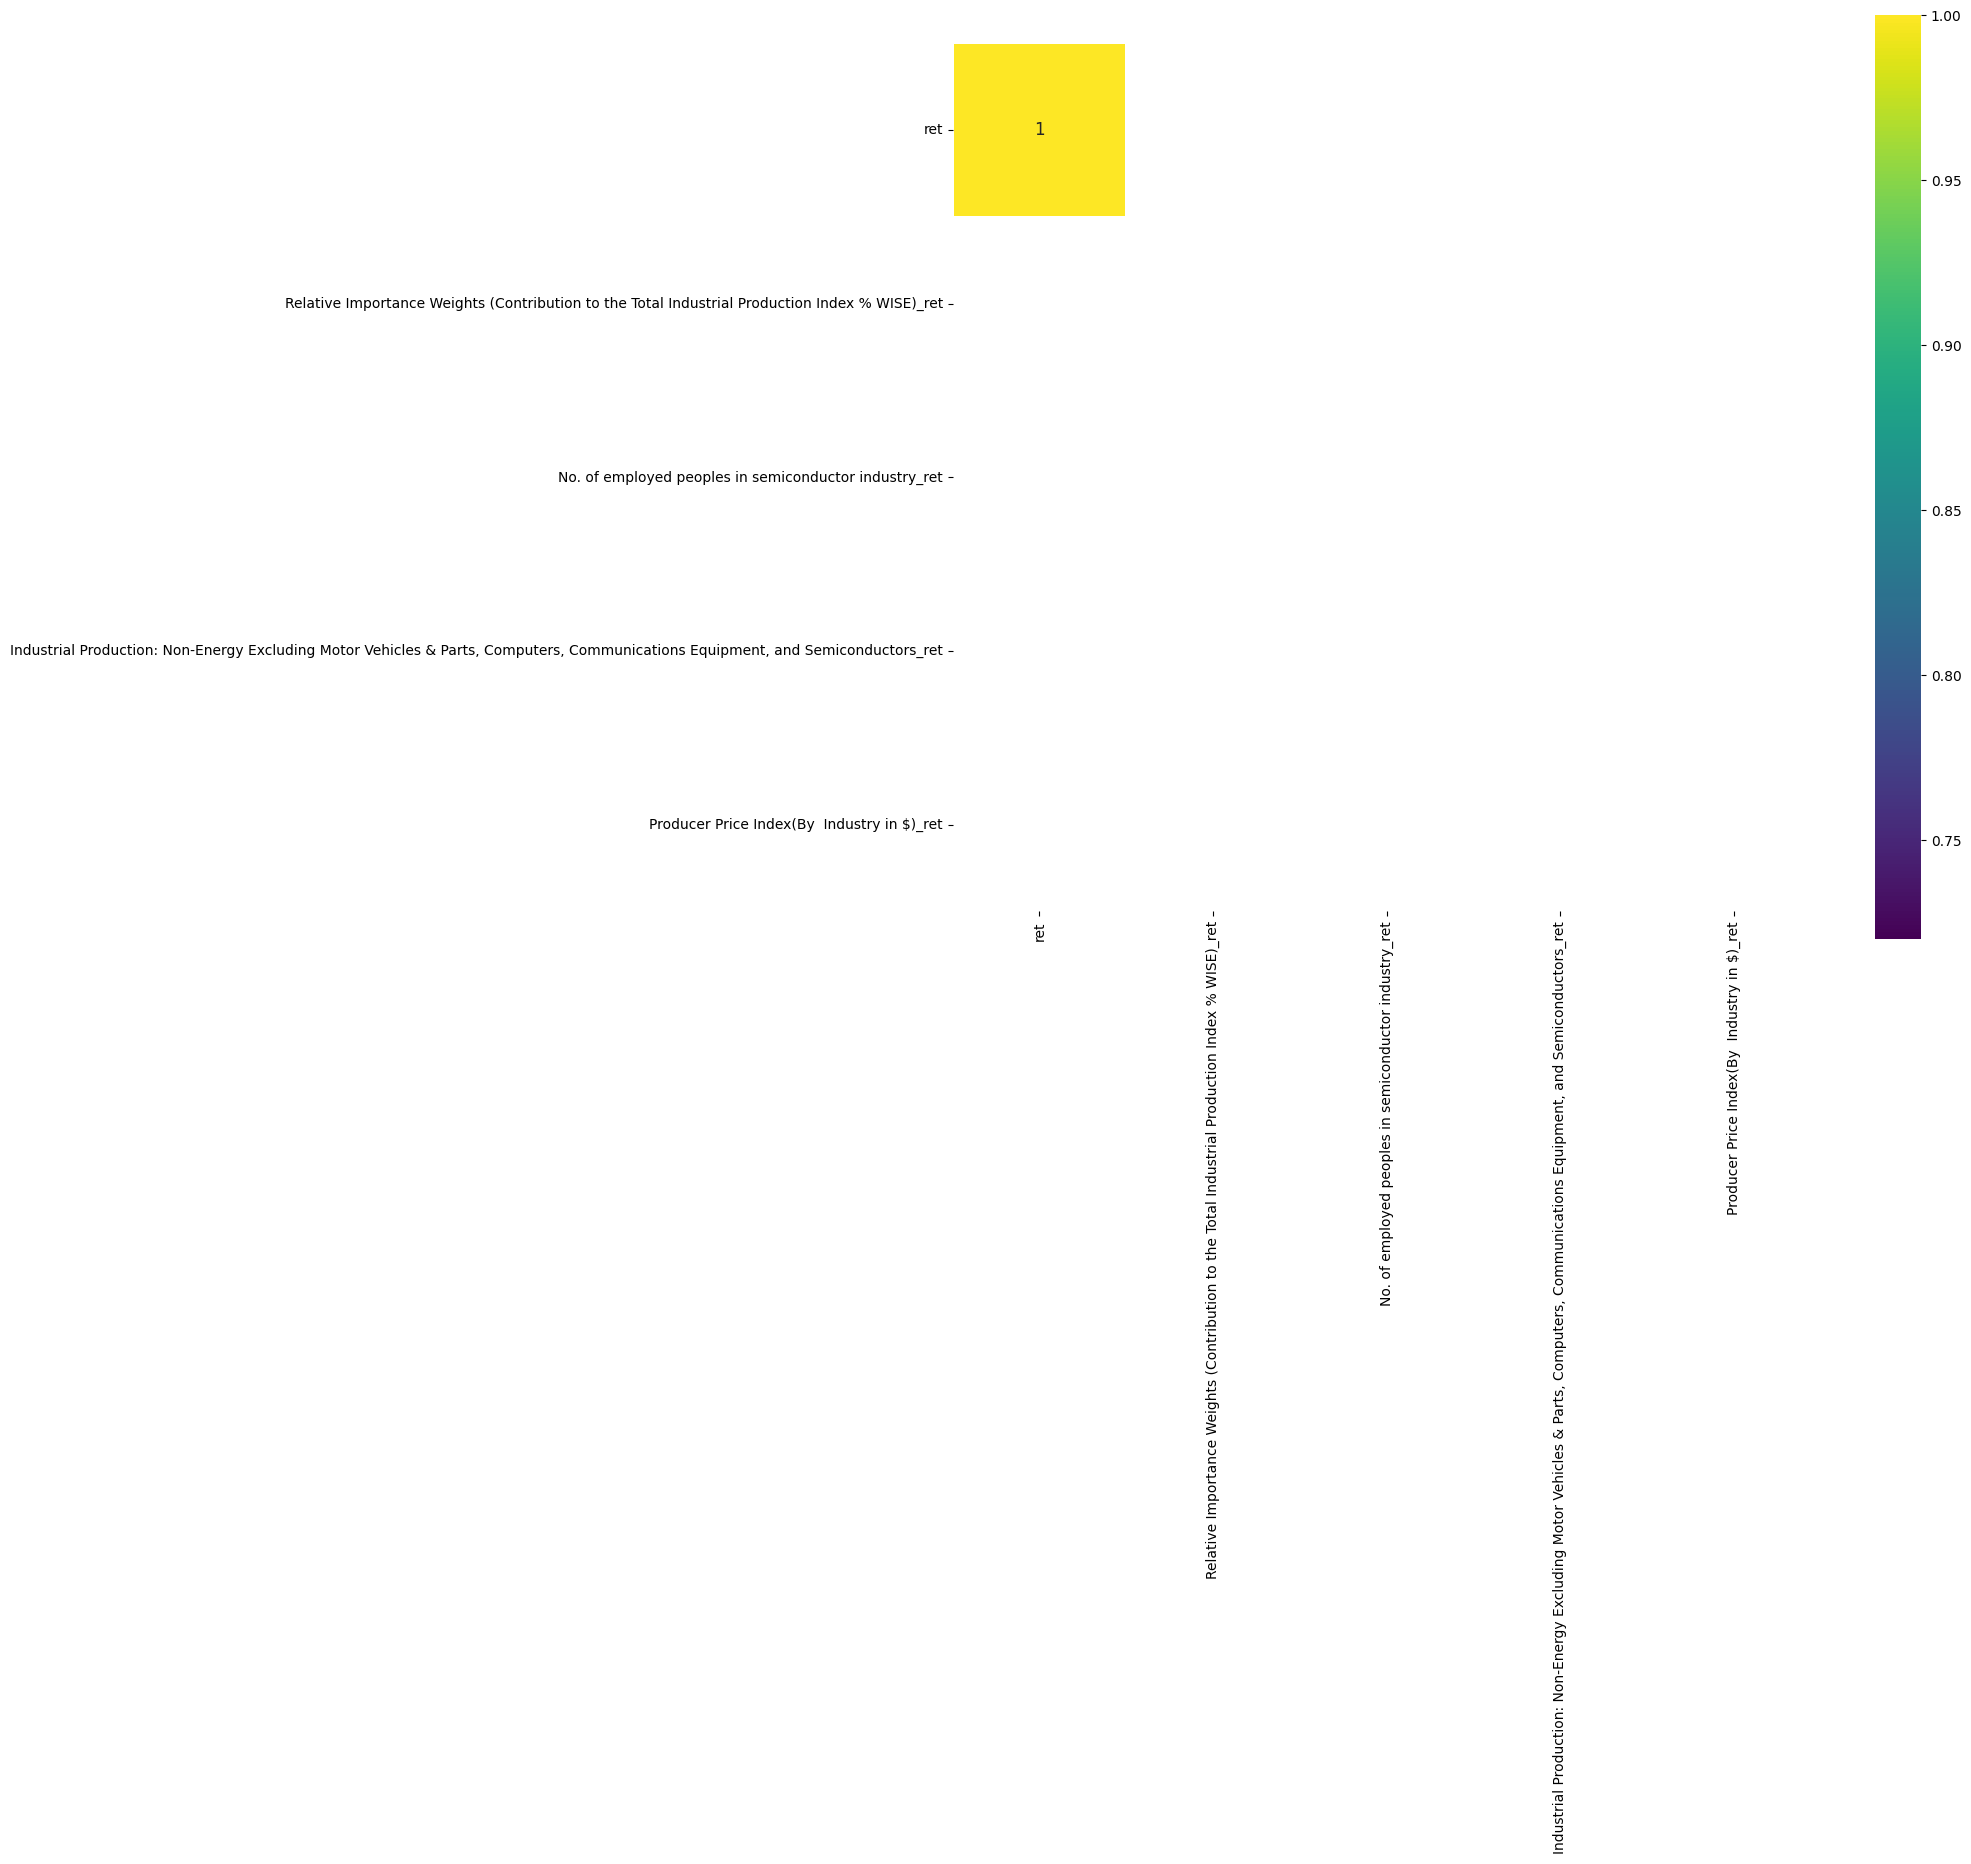

In [ ]:
cor_with_features(df,'ret',10)

In [ ]:
def test_mw(dataset,target,feature):
    stat, p = scs.mannwhitneyu(dataset[feature], dataset[target])
    print('Mann-Whitney test=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
      print('You cant reject the null hypothesis')
    else:
      print('Rejecting the null hypothesis')

In [ ]:
target = "ret"
for feature in df.columns.to_list():
  if feature not in (target, "DATE"):
    test_mw(df, target,feature)

Mann-Whitney test=82317.500, p=0.000
Rejecting the null hypothesis
Mann-Whitney test=87414.500, p=0.000
Rejecting the null hypothesis
Mann-Whitney test=136900.000, p=0.000
Rejecting the null hypothesis
Mann-Whitney test=70461.000, p=0.489
You cant reject the null hypothesis
Mann-Whitney test=0.000, p=0.000
Rejecting the null hypothesis
Mann-Whitney test=127182.000, p=0.000
Rejecting the null hypothesis
Mann-Whitney test=nan, p=nan
Rejecting the null hypothesis
Mann-Whitney test=120740.000, p=0.000
Rejecting the null hypothesis
Mann-Whitney test=0.000, p=0.000
Rejecting the null hypothesis
Mann-Whitney test=0.000, p=0.000
Rejecting the null hypothesis


In [ ]:
df.shape

(370, 12)

In [ ]:
train_data, test_data= df[:-170],df[-170:]

In [ ]:
model = Prophet()

In [ ]:
model.fit(train_data.reset_index() \
              .rename(columns={'DATE':'ds',
                               'ret':'y'}))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkoatm_ax/cn2r_lrn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkoatm_ax/i9laz2e7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25685', 'data', 'file=/tmp/tmpkoatm_ax/cn2r_lrn.json', 'init=/tmp/tmpkoatm_ax/i9laz2e7.json', 'output', 'file=/tmp/tmpkoatm_ax/prophet_model3kileiw3/prophet_model-20230825053733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:37:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:37:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_fcst = model.predict(df=test_data.reset_index() \
                                   .rename(columns={'DATE':'ds'}))

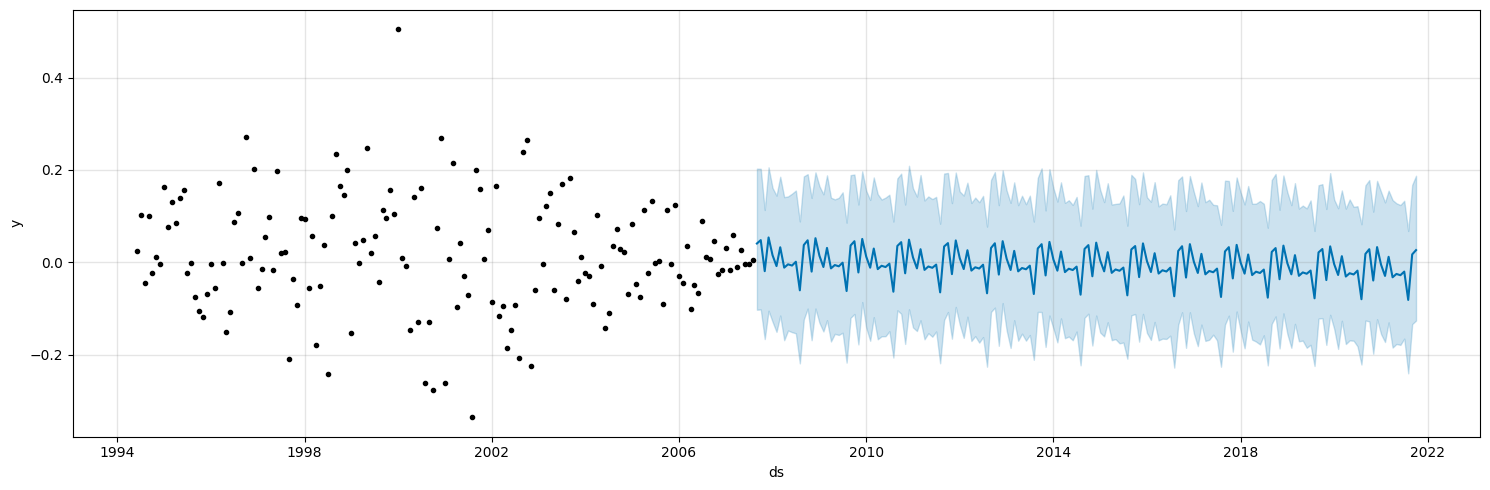

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(test_fcst,
                 ax=ax)
plt.show()

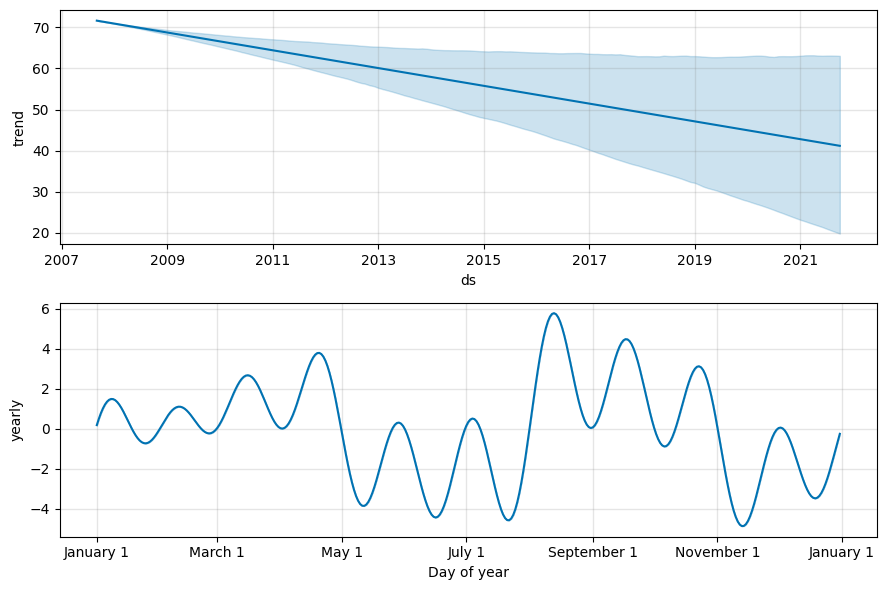

In [ ]:
fig = model.plot_components(test_fcst)
plt.show()

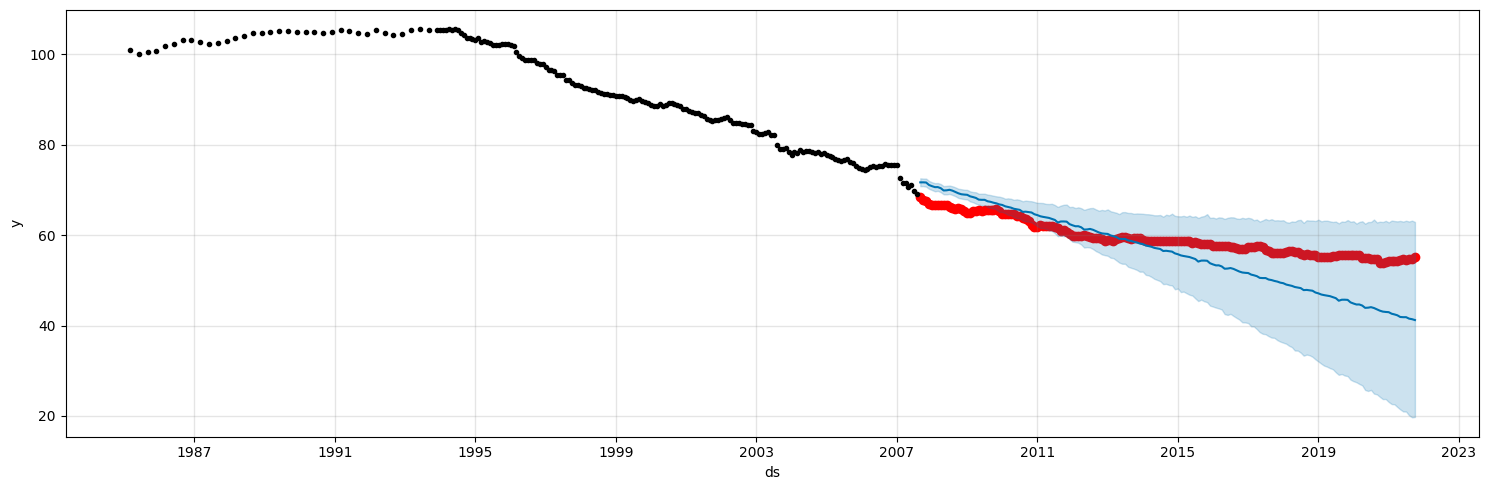

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_data['DATE'], test_data[target], color='r')
fig = model.plot(test_fcst, ax=ax)

In [1]:
sox

NameError: ignored

In [36]:
reg_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ret',
       'mm', 'DATE', 'Producer Price Index(By  Industry in $)',
       'Export Price Index(End Use of semiconductors)',
       'Import Price Index(in $ End Use of semiconductors)',
       'No. of employed peoples in semiconductor industry',
       'Export Price Index (End use excluding without semiconductors)',
       'Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)',
       'Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors',
       'Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors'],
      dtype='object')

In [37]:
reg_data.drop (["Open", "High", "Low", "Close", "Adj Close", "Volume",
                "mm", "DATE"], axis=1, inplace=True)

In [42]:
reg_data.head()

,Date,ret,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
0,1994-06-01,0.000468,105.5,138.625,161.625,532.7,163.875,6.3966,108.6875,97.6017
1,1994-06-02,-0.010483,105.5,138.625,161.625,532.7,163.875,6.3966,108.6875,97.6017
2,1994-06-03,-0.005592,105.5,138.625,161.625,532.7,163.875,6.3966,108.6875,97.6017
3,1994-06-06,-0.024594,105.5,138.625,161.625,532.7,163.875,6.3966,108.6875,97.6017
4,1994-06-07,-0.044135,105.5,138.625,161.625,532.7,163.875,6.3966,108.6875,97.6017


In [52]:
reg_data = reg_data.set_index("Date")

In [53]:
temp = reg_data['ret']
reg_data = reg_data.pct_change()
reg_data['ret'] = temp

In [63]:
reg_data.dropna(inplace=True)
reg_data

,ret,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
Date,,,,,,,,,
1994-06-02,-0.010483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-06-03,-0.005592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-06-06,-0.024594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-06-07,-0.044135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-06-08,-0.017840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-10-25,0.000168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-26,-0.009629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-27,0.023373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
reg_data.corr()

,ret,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
ret,1.000000,0.009702,0.013197,-0.010561,-0.014849,-0.002432,-0.006391,-0.045482,-0.002250
Producer Price Index(By Industry in $),0.009702,1.000000,0.069031,0.169667,0.097440,0.251856,-0.018086,-0.043388,0.073639
Export Price Index(End Use of semiconductors),0.013197,0.069031,1.000000,0.210657,0.084092,0.206045,0.110435,0.105562,-0.035780
Import Price Index(in $ End Use of semiconductors),-0.010561,0.169667,0.210657,1.000000,-0.011820,0.291229,0.062906,0.247485,-0.032023
No. of employed peoples in semiconductor industry,-0.014849,0.097440,0.084092,-0.011820,1.000000,0.078456,0.210835,0.027375,0.203192
Export Price Index (End use excluding without semiconductors),-0.002432,0.251856,0.206045,0.291229,0.078456,1.000000,-0.000280,0.034361,0.067849
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),-0.006391,-0.018086,0.110435,0.062906,0.210835,-0.000280,1.000000,-0.008777,-0.451801
"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors",-0.045482,-0.043388,0.105562,0.247485,0.027375,0.034361,-0.008777,1.000000,-0.011121
"Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors",-0.002250,0.073639,-0.035780,-0.032023,0.203192,0.067849,-0.451801,-0.011121,1.000000


In [66]:
import statsmodels.api as sm
model = sm.OLS(reg_data['ret'], reg_data.loc[:, reg_data.columns != 'ret'])
results = model.fit()
results.params

Producer Price Index(By  Industry in $)                                                                                        0.165190
Export Price Index(End Use of semiconductors)                                                                                  0.247759
Import Price Index(in $ End Use of semiconductors)                                                                            -0.056416
No. of employed peoples in semiconductor industry                                                                             -0.219596
Export Price Index (End use excluding without semiconductors)                                                                 -0.103134
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)                                    -0.054833
Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors                             -1.657147
Industrial Production: Non-Energy Excluding Moto

In [72]:
results.tvalues

Producer Price Index(By  Industry in $)                                                                                        0.627165
Export Price Index(End Use of semiconductors)                                                                                  1.593769
Import Price Index(in $ End Use of semiconductors)                                                                            -0.366700
No. of employed peoples in semiconductor industry                                                                             -1.072669
Export Price Index (End use excluding without semiconductors)                                                                 -0.589698
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)                                    -0.583361
Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors                             -3.589721
Industrial Production: Non-Energy Excluding Moto

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ret   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              2.335
Date:                Sat, 26 Aug 2023   Prob (F-statistic):                      0.0168
Time:                        14:41:12   Log-Likelihood:                          16028.
No. Observations:                6904   AIC:                                 -3.204e+04
Df Residuals:                    6896   BIC:                                 -3.199e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================================================================================================
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Producer Price Index(By  Industry in $)                                                                                         0.1652      0.263      0.627      0.531      -0.351       0.682
Export Price Index(End Use of semiconductors)                                                                                   0.2478      0.155      1.594      0.111      -0.057       0.552
Import Price Index(in $ End Use of semiconductors)                                                                             -0.0564      0.154     -0.367      0.714      -0.358       0.245
No. of employed peoples in semiconductor industry                                                                              -0.2196      0.205     -1.073      0.283      -0.621       0.182
Export Price Index (End use excluding without semiconductors)                                                                  -0.1031      0.175     -0.590      0.555      -0.446       0.240
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)                                     -0.0548      0.094     -0.583      0.560      -0.239       0.129
Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors                              -1.6571      0.462     -3.590      0.000      -2.562      -0.752
Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors    -0.0339      0.157     -0.216      0.829      -0.342       0.274
==============================================================================
Omnibus:                      637.812   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3690.262
Skew:                           0.239   Prob(JB):                         0.00
Kurtosis:                       6.550   Cond. No.                         6.26
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""